In [12]:
import os
import sys

path = os.getcwd()
while os.path.basename(os.path.normpath(path)) != 'mejiro':
    path = os.path.dirname(path)
repo_path = path
if repo_path not in sys.path:
    sys.path.append(repo_path)

In [13]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from glob import glob
from hydra import initialize, compose

from mejiro.plots import overplot, plot_util

plt.style.use(f'{repo_path}/mejiro/mplstyle/science.mplstyle')

In [14]:
with initialize(version_base=None, config_path='../config'):
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, repo_dir, pickle_dir = config.machine.array_dir, config.machine.data_dir, config.machine.repo_dir, config.machine.pickle_dir
array_dir = os.path.join(array_dir, 'skypy_output')
figure_dir = os.path.join(repo_dir, 'figures')

In [15]:
# open pickled lens list
with open(os.path.join(pickle_dir, '03_skypy_output_lens_list_models'), 'rb') as results_file:
    lens_list = pickle.load(results_file)

In [16]:
image_filepaths = glob(array_dir + '/skypy_output_0*.npy')
image_list = []
for filepath in image_filepaths:
    image_list.append(np.load(filepath))

IndexError: index 10 is out of bounds for axis 0 with size 10

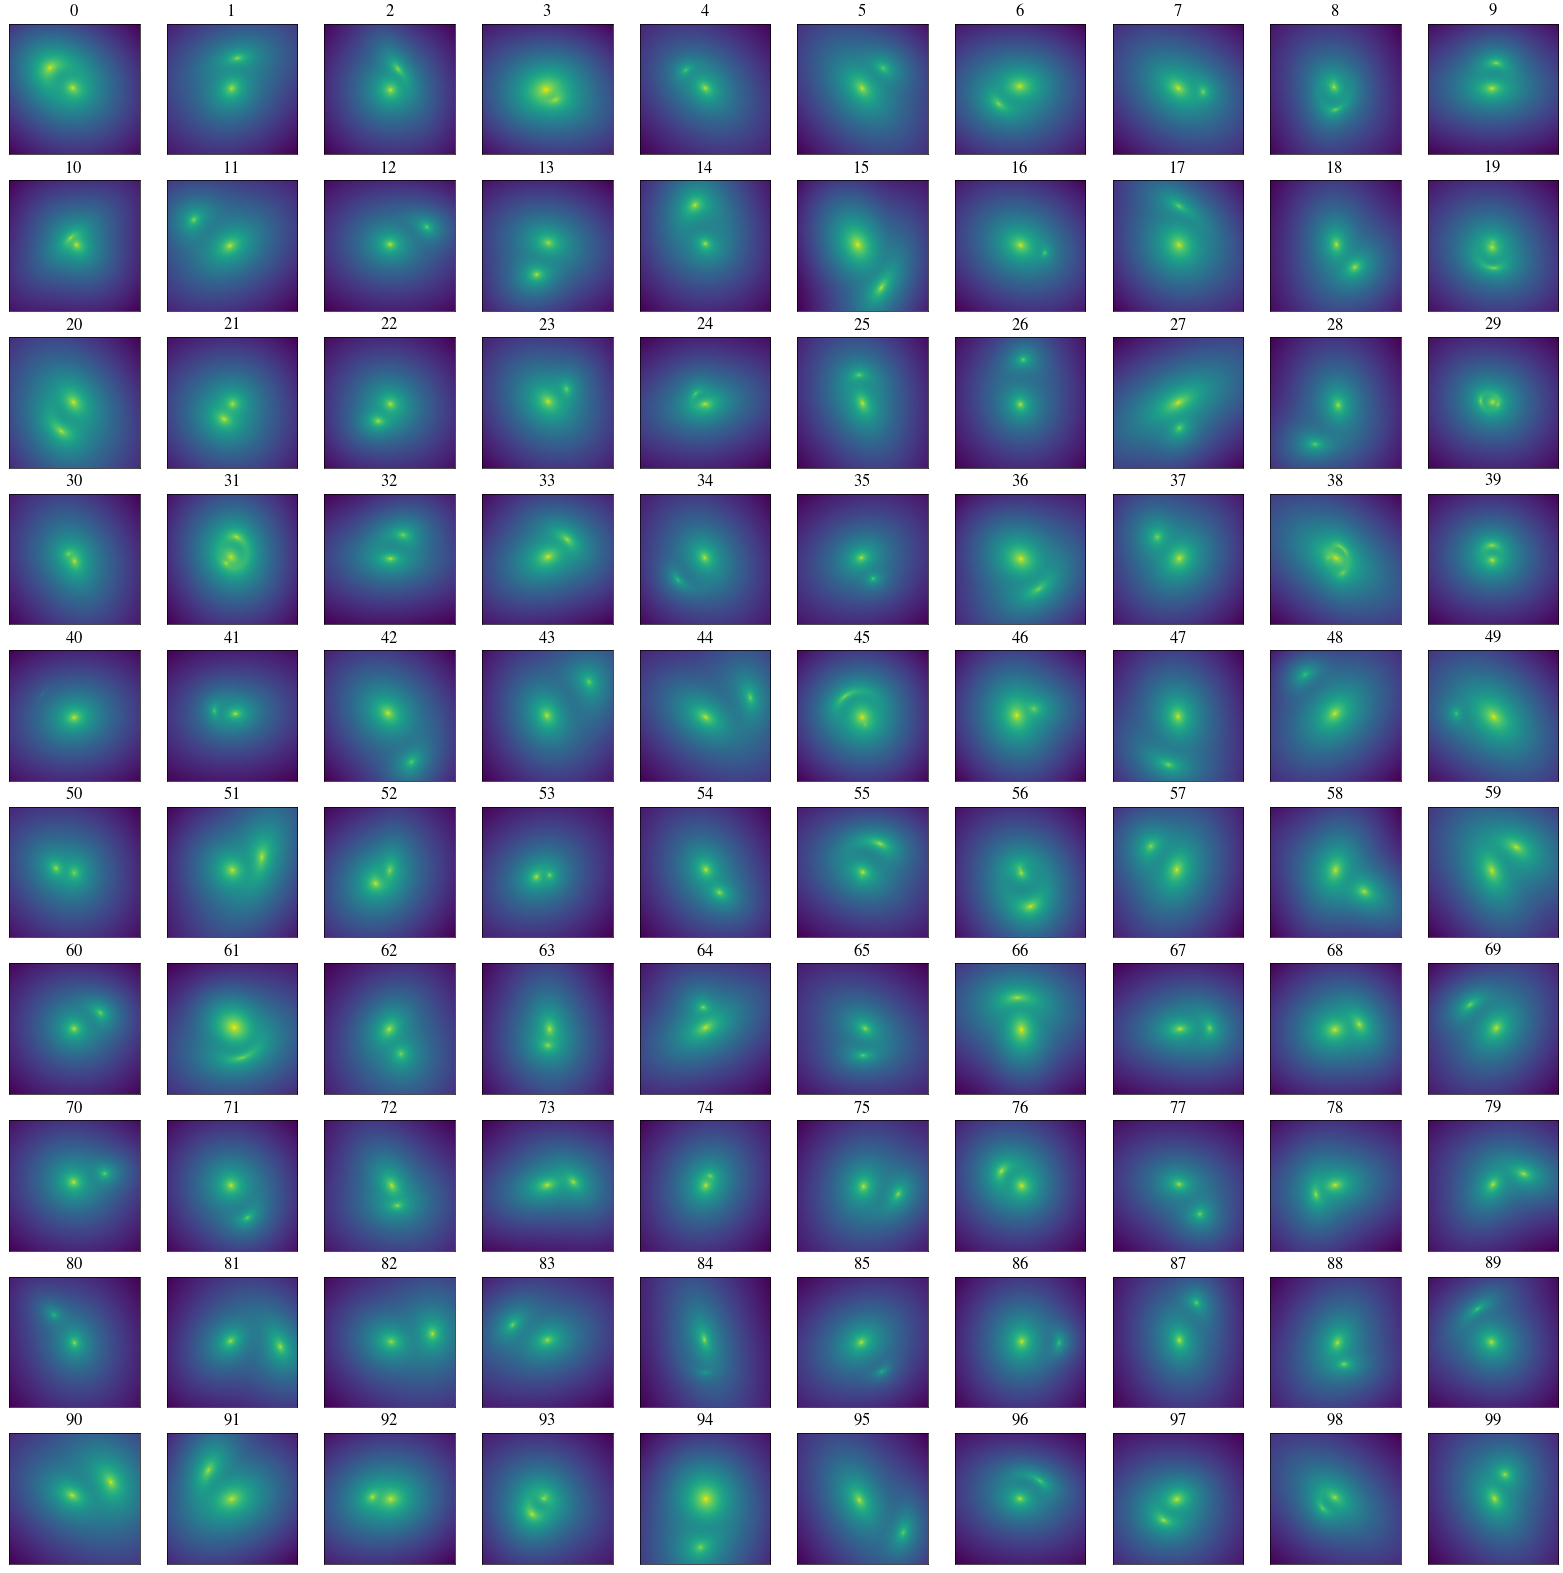

In [17]:
side = 10
f, ax = plt.subplots(nrows=side, ncols=side, figsize=(20, 20))  # , gridspec_kw={'hspace': 0.02,'wspace':0.02}

for i, image in enumerate(image_list):
    ax[i // side, i % side].imshow(np.log10(image), cmap='viridis')
    ax[i // side, i % side].get_xaxis().set_visible(False)
    ax[i // side, i % side].get_yaxis().set_visible(False)
    ax[i // side, i % side].set_title(f'{i}')

plt.savefig(os.path.join(figure_dir, 'skypy_output_test.png'))
plt.show()

IndexError: index 10 is out of bounds for axis 0 with size 10

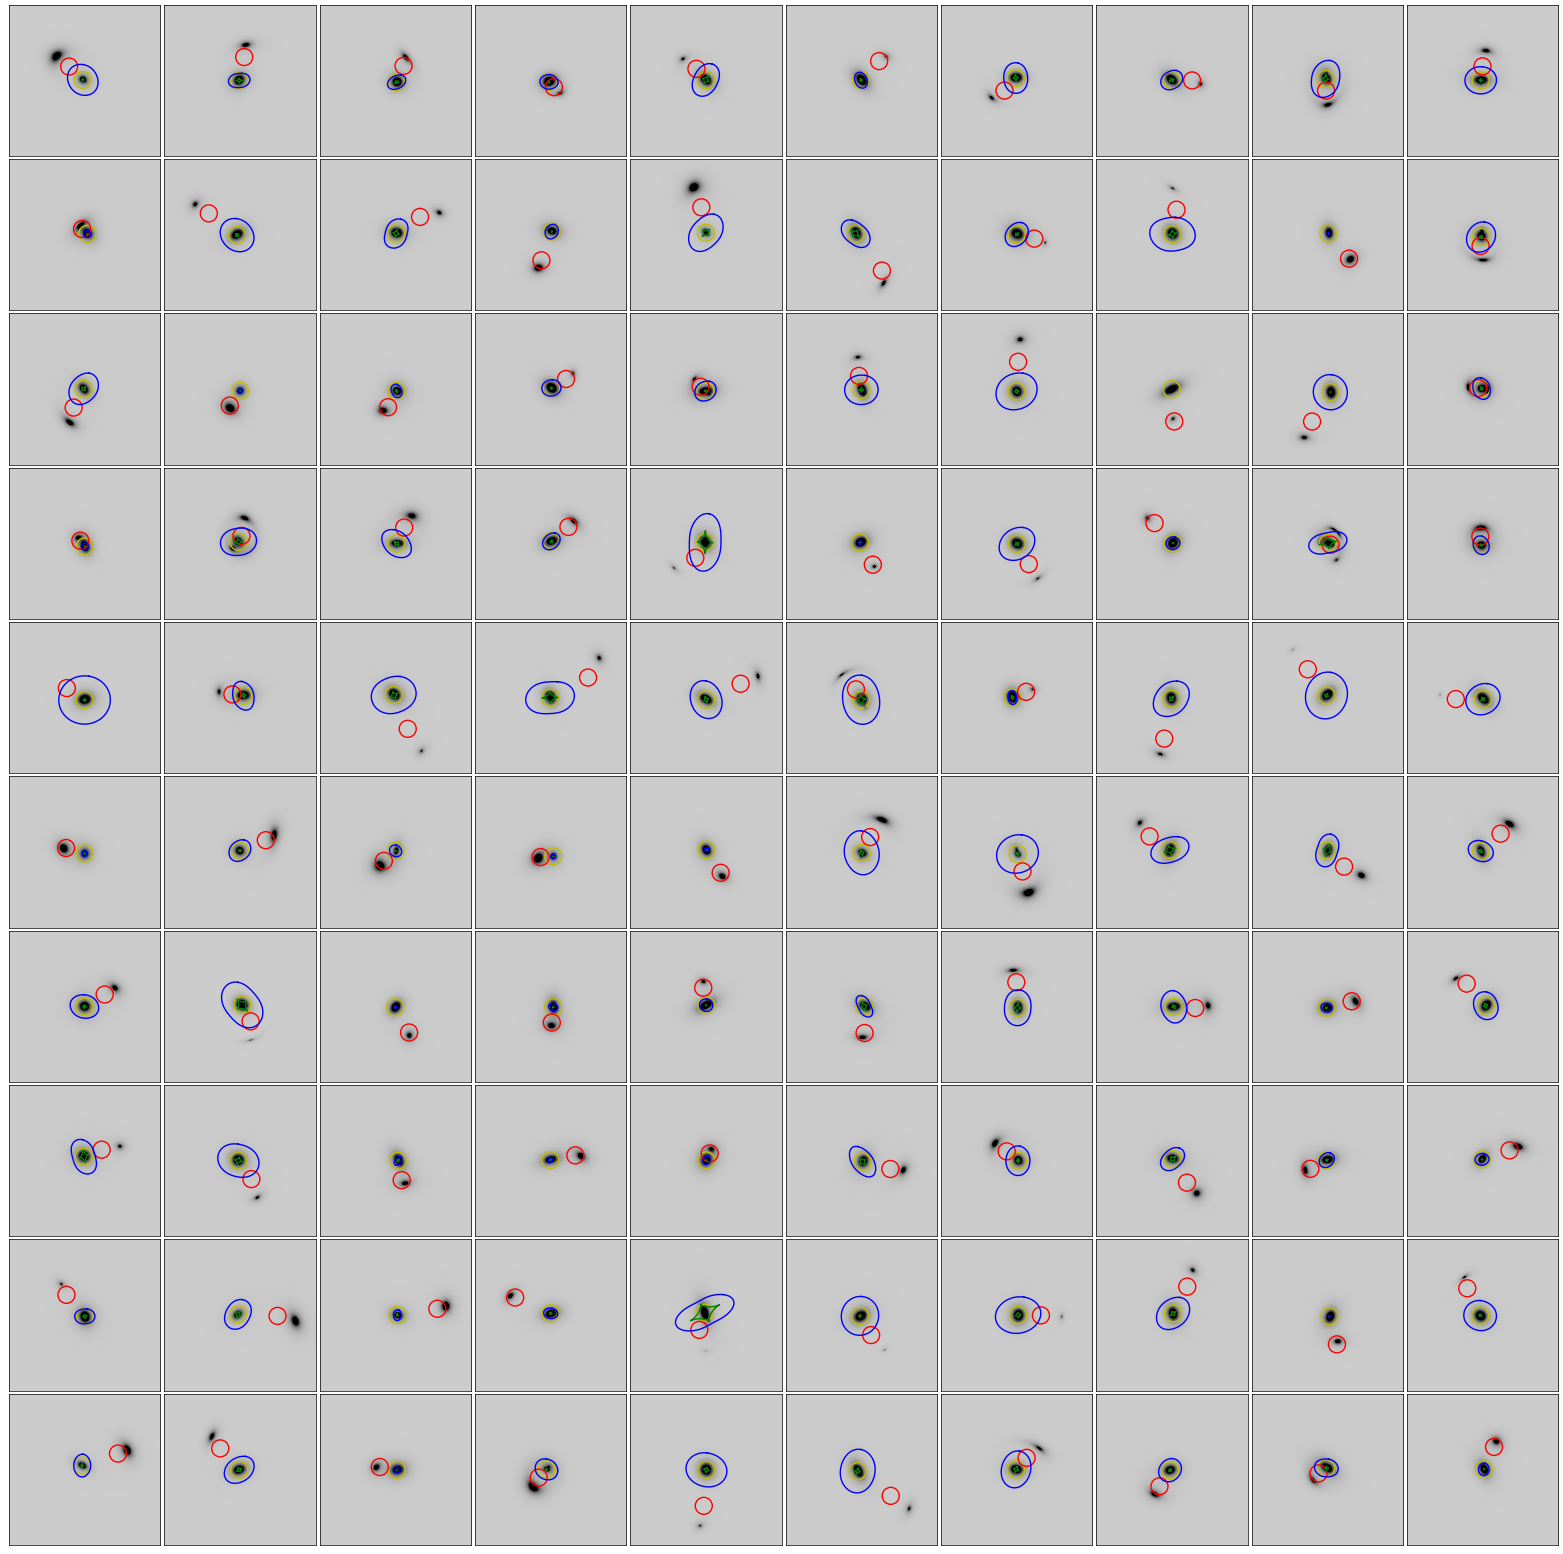

In [20]:
side = 10
f, ax = plt.subplots(nrows=side, ncols=side, figsize=(20, 20), gridspec_kw={'hspace': 0.02, 'wspace': 0.02})

import matplotlib

for i, image in enumerate(image_list):
    percentile = np.percentile(image, 99.75)
    vmin = -0.25 * percentile
    norm = matplotlib.colors.Normalize(vmin=vmin, vmax=percentile)
    ax[i // side, i % side].imshow(image, cmap='binary', norm=norm)
    ax[i // side, i % side].get_xaxis().set_visible(False)
    ax[i // side, i % side].get_yaxis().set_visible(False)

    lens = lens_list[i]
    try:
        overplot.source_position(ax[i // side, i % side], lens)
        overplot.lens_position(ax[i // side, i % side], lens)
        overplot.caustics(ax[i // side, i % side], lens)
        overplot.critical_curves(ax[i // side, i % side], lens)
    except:
        continue

plt.savefig(os.path.join(figure_dir, 'skypy_output_test.png'))
plt.show()

IndexError: index 10 is out of bounds for axis 0 with size 10

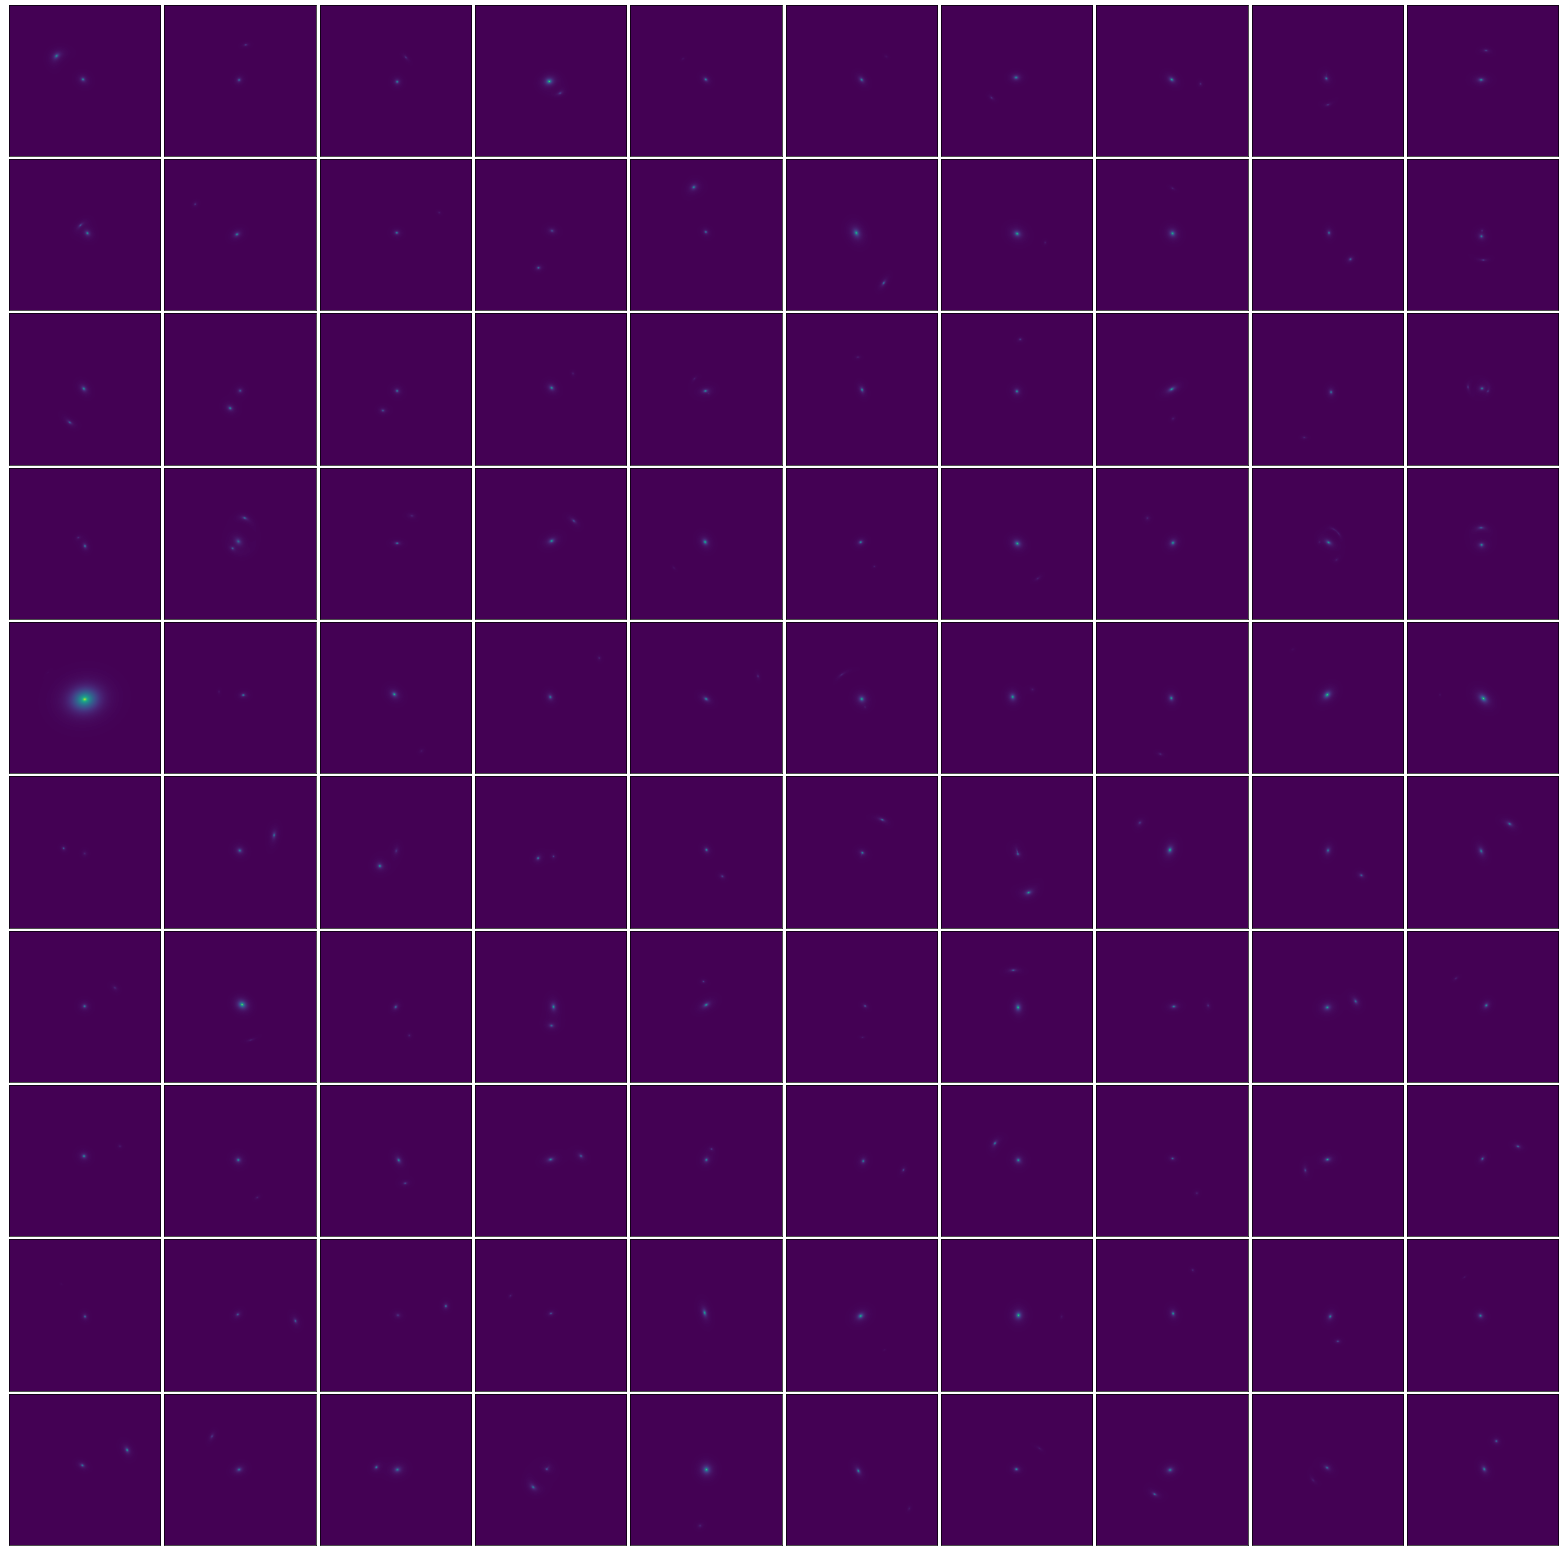

In [21]:
side = 10
f, ax = plt.subplots(nrows=side, ncols=side, figsize=(20, 20), gridspec_kw={'hspace': 0.02, 'wspace': 0.02})

for i, image in enumerate(image_list):
    ax[i // side, i % side].imshow(plot_util.asinh(image), cmap='viridis')
    ax[i // side, i % side].get_xaxis().set_visible(False)
    ax[i // side, i % side].get_yaxis().set_visible(False)

plt.savefig(os.path.join(figure_dir, 'skypy_output_test.png'))
plt.show()